In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import info
import cv2
import numpy as np

In [2]:


# image  = cv2.imread('C:/Users/Hammock/Desktop/img.jpg')
# hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# low = np.array([25, 52, 72])
# high = np.array([102, 255, 255])
# mask = cv2.inRange(hsv, low, high)
# cv2.imwrite('C:/Users/Hammock/Desktop/img_mask.jpg', mask)

In [3]:
# EVALUATION PLOTS

path = '../results/foraging/evaluation/'
dumb_df = pd.read_csv(path+'eval_dumb.tsv', sep='\t')
obs_3_df = pd.read_csv(path+'eval_model_andi.tsv', sep='\t')
obs_5_df = pd.read_csv(path+'eval_model_seb.tsv', sep='\t')
eval_test_df = pd.read_csv('C:/Users/Hammock/Documents/VU_masters_AI/learning_machines/learning_machines_robobo/results/foraging/andi/eval_test/eval_model_andi_0.97.tsv', sep='\t')

In [4]:
# rename index col
dumb_df = dumb_df.rename(columns={'Unnamed: 0': 'index'})
obs_3_df = obs_3_df.rename(columns={'Unnamed: 0': 'index'})
obs_5_df = obs_5_df.rename(columns={'Unnamed: 0': 'index'})
eval_test_df = eval_test_df.rename(columns={'Unnamed: 0': 'index'})
dumb_df.tail()

,index,action_index,episode_index,time_elapsed
23,23,0.0,23.0,1438000.0
24,24,0.0,24.0,1489500.0
25,25,0.0,25.0,1531000.0
26,26,0.0,26.0,1621500.0
27,27,0.0,27.0,1690000.0


In [5]:
# remove row with outlier(s)
obs_5_df.drop(index=[21,43,44], inplace=True)
eval_test_df.head()

,index,Unnamed: 0.1,accu_reward,avg_food_distance,time_passed,Model_ind
0,0,0,51.897059,1.134217,50000.0,1
1,1,1,73.975143,0.959880,45000.0,1
2,2,2,21.510034,0.788285,48000.0,1
3,3,3,97.529076,0.870159,31500.0,1
4,4,4,56.461150,0.663245,39000.0,1


In [6]:
_df = pd.DataFrame()
prev_v = 0
for k,v in enumerate(dumb_df['time_elapsed']):
    value = dumb_df.iloc[k]['time_elapsed'] - prev_v
    _df = _df.append({"time_elapsed": value}, ignore_index=True)
    prev_v = dumb_df.iloc[k]['time_elapsed']

dumb_df['time_elapsed'] = _df['time_elapsed']
# dumb_df['time_elapsed']

In [7]:
_df = pd.DataFrame({'index': dumb_df['index'], 'hardcoded': dumb_df['time_elapsed'], '3_obs_model': obs_3_df['time_passed'], '5_obs_model': obs_5_df['time_passed'], 'eval_test': eval_test_df['time_passed']})

In [8]:

# plot 
fig, ax = plt.subplots(figsize=(15,10))
melt = _df.melt(id_vars='index', value_vars=['hardcoded', '3_obs_1_hr', '3_obs_3_hr', '5_obs_3_hr'])
sns.boxplot(data=melt, x='variable', y='value')
plt.xlabel('model')
plt.ylabel('time (ms)')
plt.title('Time taken per model for foraging task')
plt.savefig('../img/task_2/eval_boxplot.png')

KeyError: "The following 'value_vars' are not present in the DataFrame: ['3_obs_1_hr', '3_obs_3_hr', '5_obs_3_hr']"

In [27]:
# LEARNING PLOTS

path = '../results/foraging/'
obs_3_df = pd.read_csv(path+'andi/final_model/learning_progress.tsv', sep='\t')
obs_5_df = pd.read_csv(path+'seb/final_model/learning_progress.tsv', sep='\t')
obs_3_df.count()

Unnamed: 0           300
accu_reward          300
avg_food_distance    300
time_passed          300
dtype: int64

In [24]:
# rename index col
obs_3_df = obs_3_df.rename(columns={'Unnamed: 0': 'index'})
obs_5_df = obs_5_df.rename(columns={'Unnamed: 0': 'index'})


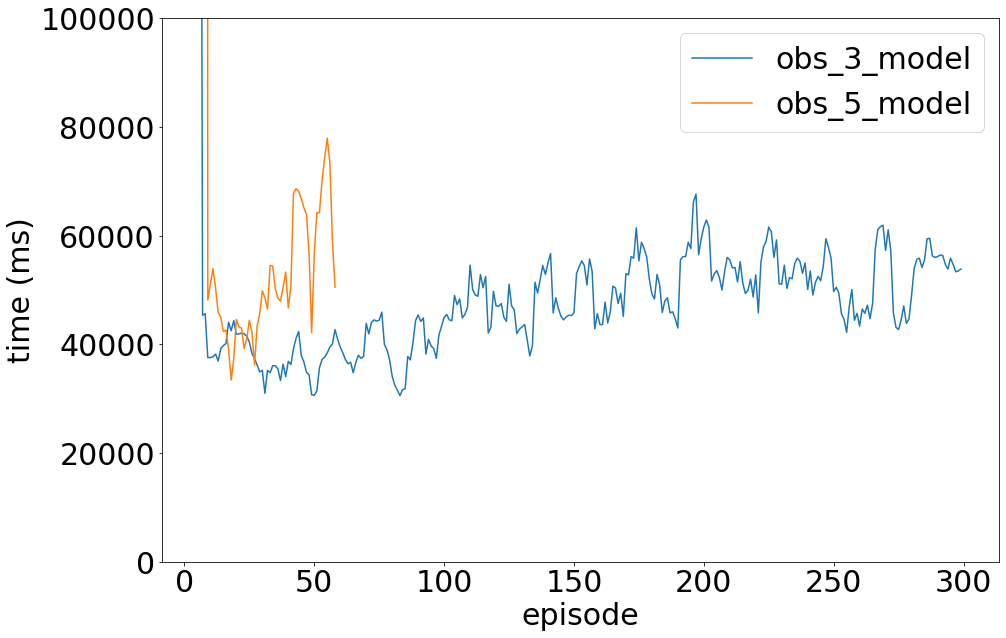

In [29]:
obs3 = obs_3_df['time_passed'].rolling(7)
obs3 = obs3.mean()
obs5 = obs_5_df['time_passed'].rolling(7)
obs5 = obs5.mean()



plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 30})

plt.plot(obs3)
plt.plot(obs5)
plt.ylim([0,0.1e6])
# plt.xlim([0,150])
plt.xlabel('episode')
plt.ylabel('time (ms)')
plt.legend(['obs_3_model', 'obs_5_model'])
# plt.title('Learning rate of model with 3 observations against 5 observations with regards to time (ms)')
plt.savefig('../img/task_2_learning_lineplot.eps')

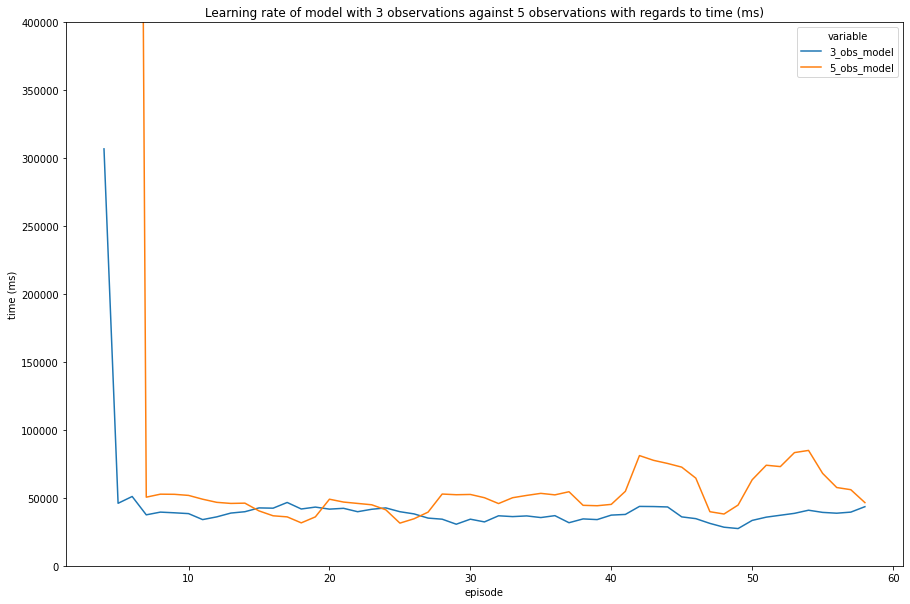

In [17]:

# group per episode and append to new df
# _df = pd.DataFrame()
# for k,v in df.groupby('episode_index'):
#     _df = _df.append({'episode_index': int(k), 'reward': v['reward'].sum(), 'v_measure_sensor_distance': v['v_measure_sensor_distance'].sum(), 'epsilon': v['epsilon'].min()}, ignore_index=True)
#     print(v['reward'].sum())

obs3 = obs_3_df['time_passed'].rolling(5)
obs3 = obs3.mean()
obs5 = obs_5_df['time_passed'].rolling(5)
obs5 = obs5.mean()


tmp = pd.DataFrame()
for i,v in enumerate(obs5):
    tmp = tmp.append({'index': i, '3_obs_model': obs3[i], '5_obs_model': obs5[i]}, ignore_index=True)


_df = pd.DataFrame({'index': obs_3_df['index'], '3_obs_model': obs_3_df['time_passed'], '5_obs_model': obs_5_df['time_passed']})

# plot 
fig, ax = plt.subplots(figsize=(15,10))
melt = tmp.melt(id_vars='index', value_vars=['3_obs_model', '5_obs_model'])
sns.lineplot(data=melt, x='index', y='value', hue='variable')
plt.ylim([0,0.4e6])
# plt.xlim([0,150])
plt.xlabel('episode')
plt.ylabel('time (ms)')
plt.title('Learning rate of model with 3 observations against 5 observations with regards to time (ms)')
plt.savefig('../img/task_2_learning_lineplot.png')

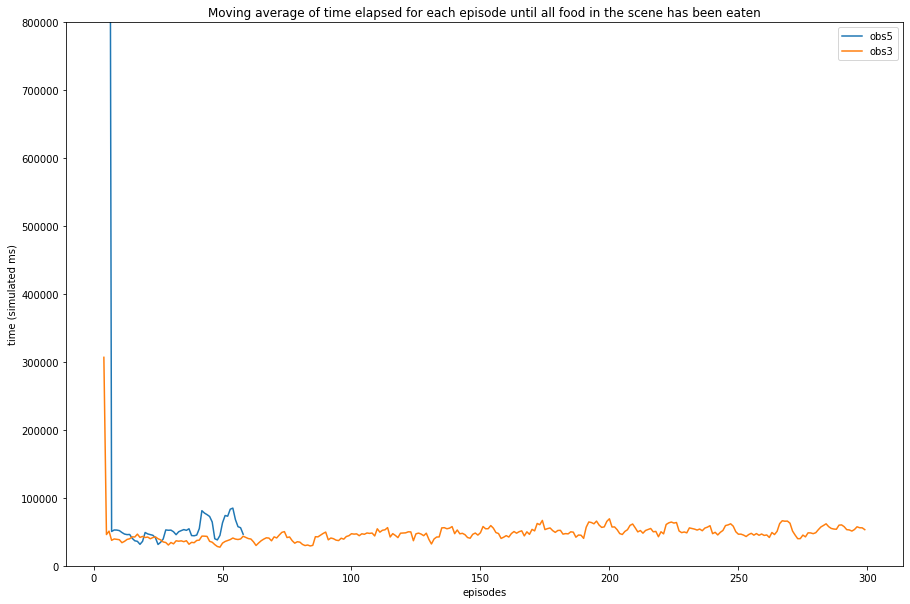

In [15]:
# LEARNING PLOTS

path = '../results/foraging/'
obs_3_df = pd.read_csv(path+'andi/final_model/learning_progress.tsv', sep='\t')
obs_5_df = pd.read_csv(path+'seb/final_model/learning_progress.tsv', sep='\t')
# rename index col
obs_3_df = obs_3_df.rename(columns={'Unnamed: 0': 'index'})
obs_5_df = obs_5_df.rename(columns={'Unnamed: 0': 'index'})

obs3 = obs_3_df['time_passed'].rolling(5)
obs3 = obs3.mean()
obs5 = obs_5_df['time_passed'].rolling(5)
obs5 = obs5.mean()


plt.figure(figsize=(15,10))
plt.plot(obs5)
plt.plot(obs3)
# plt.legend()
plt.ylim([0, 0.8e6])
# plt.xlim([0,150])
plt.ylabel('time (simulated ms)')
plt.xlabel('episodes')
plt.legend(['obs5','obs3'])
plt.title('Moving average of time elapsed for each episode until all food in the scene has been eaten')
plt.savefig('./eadjkhfk.png')